In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import os

In [2]:
root_path = './'
methods = ['fedcls_vanilla', 'fedpet_avg', 'fedpet_voting', 'fedpet_voting_avg', 'local_pet', 'fedpet_voting_avg_2', 'local_pet_2', 'fedpet_voting_avg_3']
colors = ['g', 'r', 'b', 'y', 'purple','k', 'olive','cyan']

sampled_data = 40
clients_in_total = 10
clients = 5
iter = 100

log_paths = []
csv_paths = []
for method in methods:
    log_paths.append(os.path.join(root_path, 'log_' + method + '_' + str(sampled_data) + '_' + str(clients_in_total) + ".log"))
    csv_paths.append(os.path.join(root_path, method + '_' + str(sampled_data) + '_' + str(clients_in_total) + ".csv"))

In [3]:
for i in range(len(methods)):
    method = methods[i]
    log_path = log_paths[i]
    phrase = 'modeling - /data/cdq/pet/' + 'log_' + method + '_' + str(sampled_data) + '_' + str(clients_in_total)
    with open(log_path) as f:
        f = f.readlines()
    df = pd.DataFrame(data=None,index = range(iter), columns = range(clients))

    for line in f:
        if phrase in line:
           
            gen = int(re.findall(r'/g(.+?)/',line)[0])
            client = int(re.findall(r'client(.+?)',line)[0])

            score_line = f[f.index(line)+2]
            acc = float(re.findall(r':?(\d+\.\d+)',score_line)[0])
            df[client][gen]=acc
    df.to_csv(csv_paths[i])

    print(log_path)
    print(df)


./log_fedcls_vanilla_40_10.log
           0         1         2         3         4
0   0.250263  0.250789  0.250132  0.250132  0.251447
1   0.250132  0.249474  0.249737  0.250658  0.250395
2   0.251184  0.249737  0.251447  0.249868  0.250395
3   0.266579  0.258553  0.250526  0.250658  0.256184
4   0.257632  0.288026  0.310263  0.302763  0.259737
..       ...       ...       ...       ...       ...
95  0.717105  0.720263  0.718289  0.725132  0.717895
96  0.725263    0.7175  0.721447  0.718421  0.717895
97  0.727237  0.720526  0.718553  0.725132  0.714737
98  0.724605  0.718947  0.726974  0.722895  0.719211
99  0.718158  0.719737  0.721447  0.720658  0.716447

[100 rows x 5 columns]
./log_fedpet_avg_40_10.log
           0         1         2         3         4
0   0.603816  0.491316  0.420395    0.6825  0.801184
1   0.648158  0.731053  0.519474    0.4925  0.662763
2   0.493026  0.830526  0.701974  0.734737  0.728026
3      0.675  0.514868  0.835395  0.605395  0.769342
4   0.796579  0.6

IndexError: list index out of range

fedcls_vanilla
[0 0 0 0 0] [0.25026316 0.25078947 0.25013158 0.25013158 0.25144737]
[1 1 1 1 1] [0.25013158 0.24947368 0.24973684 0.25065789 0.25039474]
[2 2 2 2 2] [0.25118421 0.24973684 0.25144737 0.24986842 0.25039474]
[3 3 3 3 3] [0.26657895 0.25855263 0.25052632 0.25065789 0.25618421]
[4 4 4 4 4] [0.25763158 0.28802632 0.31026316 0.30276316 0.25973684]
[5 5 5 5 5] [0.34578947 0.35907895 0.29026316 0.34065789 0.26539474]
[6 6 6 6 6] [0.39447368 0.34157895 0.30618421 0.32907895 0.40802632]
[7 7 7 7 7] [0.42684211 0.36763158 0.35473684 0.36394737 0.35539474]
[8 8 8 8 8] [0.43473684 0.44236842 0.36381579 0.36184211 0.39539474]
[9 9 9 9 9] [0.42052632 0.42802632 0.38157895 0.41776316 0.41763158]
[10 10 10 10 10] [0.44671053 0.43407895 0.45986842 0.48381579 0.45605263]
[11 11 11 11 11] [0.4475     0.45434211 0.45578947 0.48815789 0.46434211]
[12 12 12 12 12] [0.50184211 0.47618421 0.45921053 0.46578947 0.48315789]
[13 13 13 13 13] [0.48394737 0.51394737 0.51052632 0.51328947 0.50184211]

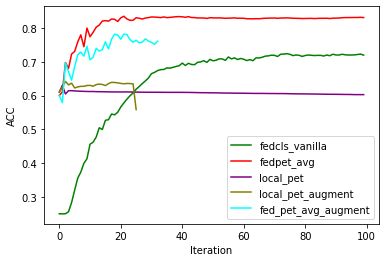

In [6]:
fig = plt.figure()
plt.xlabel('Iteration')
plt.ylabel('ACC')

methods_shown = ['fedcls_vanilla', 'fedpet_avg', 'local_pet', 'fedpet_voting_avg_3','local_pet_2']# 
labels = ['fedcls_vanilla', 'fedpet_avg', 'local_pet', 'local_pet_augment', 'fed_pet_avg_augment'] # 
label_idx = 0
# ['fedcls_vanilla', 'fedpet_avg', 'fedpet_voting', 'fedpet_voting_avg', 'local_pet', 'fedpet_voting_avg_2', 'local_pet_2', 'fedpet_voting_avg_3']

for i in range(len(methods)):
    print(methods[i])
    if methods[i] in methods_shown:
        pass
    else:
        continue
    csv_path = csv_paths[i]
    df = pd.read_csv(csv_path,index_col=0)
    y_mean = []
    for j in range(iter):
        # if j > 20:
        #     break
        x = np.array([j]*5)
        y = np.array(df.iloc[j])
        print(x,y)
        y_mean.append(pd.DataFrame(y).dropna().mean())
        # plt.scatter(x, y,color=colors[i])
    plt.plot(range(iter),y_mean,color=colors[i],label=labels[label_idx])
    label_idx = label_idx + 1


plt.legend()

plt.savefig('utility of unlabeled data.pdf')
plt.show()